## Logistic Regression Model with CountVectorizer

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.feature_extraction import text
from sklearn.linear_model import LogisticRegression

from nltk.stem.porter import PorterStemmer
import pickle

In [3]:
corpus = pd.read_csv('../data/corpus.csv',index_col='Unnamed: 0')
corpus = corpus[corpus['subreddit']!='Anxiety']

In [4]:
X = corpus['full_text']
y = corpus['subreddit'].map({'depression':1,'CasualConversation':0,'happy':0})

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=21)

In [7]:
my_stop = ['no_text', '\n&gt;' ,'https', 'com', 'www', 'don','just','like','know']
stop_words = text.ENGLISH_STOP_WORDS.union(my_stop)

cvect = CountVectorizer(stop_words=stop_words,max_features=300)
tfidf = TfidfVectorizer(stop_words=stop_words,max_features=300)

In [8]:
def split_stem(text):
    text = text.lower()
    p_stemmer = PorterStemmer()
    return ' '.join([p_stemmer.stem(word) for word in text.split()])

#### Grid Search to Find Good Logistic Regression Parameters

In [15]:
pipe = make_pipeline(cvect,LogisticRegression())
params = {
    'countvectorizer__ngram_range': [(1,1),(1,2)],
    'countvectorizer__preprocessor':[split_stem],
    'countvectorizer__max_features':[300, 600, 1200],
    'logisticregression__C':[0.4,0.5],
    
}

In [16]:
grid = GridSearchCV(pipe,params,n_jobs=-1)

In [17]:
grid.fit(X_train,y_train)

C:\Users\Varun\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'gt', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'http', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(max_features=300,
                                                        stop_words=frozenset({'\n'
                                                                              '&gt;',
                                                                              'a',
                                                                              'about',
                                                                              'above',
                                                                              'across',
                                                                              'after',
                                                                              'afterwards',
                                                                              'again',
                                                                              'against'

In [18]:
grid.best_params_

{'countvectorizer__max_features': 1200,
 'countvectorizer__ngram_range': (1, 1),
 'countvectorizer__preprocessor': <function __main__.split_stem(text)>,
 'logisticregression__C': 0.5}

In [19]:
grid.score(X_train,y_train)

0.8685333333333334

In [20]:
grid.score(X_test,y_test)

0.8521333333333333

#### Building the Best Model to Save

In [69]:
my_stop = ['no_text', '\n&gt;' ,'https', 'com', 'www', 'don','just','like','know', 'fucking', 've']
stop_words = text.ENGLISH_STOP_WORDS.union(my_stop)

In [76]:
cvect = CountVectorizer(
    stop_words=stop_words,
    max_features=1200,
    preprocessor=split_stem)

logr = LogisticRegression(C=0.5)

In [77]:
model_c = make_pipeline(cvect,logr)

In [79]:
model_c.fit(X_train,y_train)

C:\Users\Varun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=1200,
                                 preprocessor=<function split_stem at 0x000001BFCC568A60>,
                                 stop_words=frozenset({'\n&gt;', 'a', 'about',
                                                       'above', 'across',
                                                       'after', 'afterwards',
                                                       'again', 'against',
                                                       'all', 'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                

In [80]:
model_c.score(X_train,y_train), model_c.score(X_test,y_test)

(0.8687333333333334, 0.8521333333333333)

#### Saving Model as PKL and Loading it Back in to Evaluate

In [83]:
filename = '../data/model_c.pkl'
pickle.dump(model_c, open(filename, 'wb'))

In [84]:
model_cr = loaded_model = pickle.load(open(filename, 'rb'))

In [85]:
preds = model_cr.predict(X_test)
preds

C:\Users\Varun\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'fuck', 'gt', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'http', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not 

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [88]:
y_test = y_test.to_numpy()
y_test

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [89]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [90]:
cm = confusion_matrix(y_test,preds.ravel())
cm

array([[6774,  717],
       [1501, 6008]], dtype=int64)

Text(69.0, 0.5, 'True')

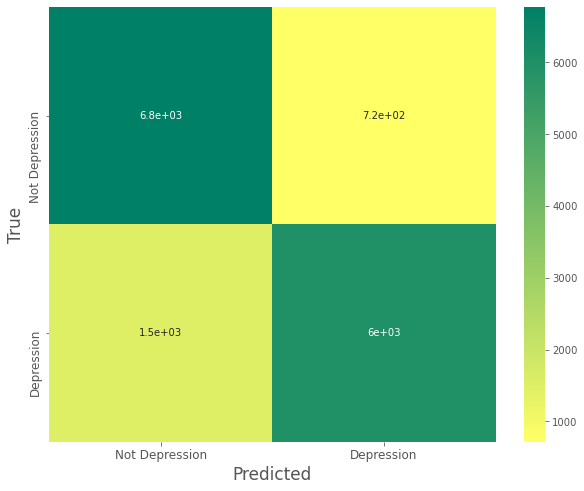

In [91]:
plt.figure(figsize=(10,8))
g = sns.heatmap(cm, annot=True,cmap='summer_r'); #annot=True to annotate cells
g.xaxis.set_ticklabels(['Not Depression', 'Depression'],size=12)
g.yaxis.set_ticklabels(['Not Depression', 'Depression'],size=12)

g.set_xlabel("Predicted",size=17)
g.set_ylabel("True",size=17)
# X-axis is predicted labels
# y-axis is true labels

In [92]:
model_cr.predict_proba(["i am very depressed"])[0][1]

0.6810867715714605